# Funding of the Indian startups 

1.This dataset has funding information of the Indian startups from January 2015 to August 2017.

2.Feature Details :

    SNo - Serial number.
    Date - Date of funding in format DD/MM/YYYY.
    StartupName - Name of the startup which got funded.
    IndustryVertical - Industry to which the startup belongs.
    SubVertical - Sub-category of the industry type.
    CityLocation - City which the startup is based out of.
    InvestorsName - Name of the investors involved in the funding round.
    InvestmentType - Either Private Equity or Seed Funding.
    AmountInUSD - Funding Amount in USD.
    Remarks - Other information, if any.

3.Insights : 

    Find out what type of startups are getting funded in the last few years?
    Who are the important investors?
    What are the hot fields that get a lot of funding these days?

In [147]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
dataset=open("startup_funding.csv")
dataset=pd.read_csv(dataset)

### 1. Number of fundings in each year

  Check the trend of investments over the years. To check the trend, find -
     
     Total number of fundings done in each year.
     Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
     Print year-wise total number of fundings. Print years in ascending order.

**1.1 method 1**

2015 936
2016 993
2017 443


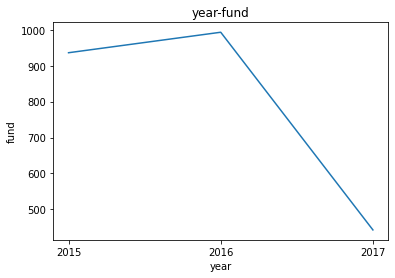

In [148]:
data=dataset.copy()
data['Date'].replace("12/05.2015","12/05/2015",inplace=True)
data['Date'].replace("13/04.2015","13/04/2015",inplace=True)
data['Date'].replace("15/01.2015","15/01/2015",inplace=True)
data['Date'].replace("22/01//2015","22/01/2015",inplace=True)
def datetrans(date):
    return date.split('/')[-1]
data['year']=data['Date'].apply(datetrans)# create a new variable 'year'
date=data['year'].value_counts()
year_fund=list(zip(date.index,date.values))
year_fund=np.array(year_fund,dtype=int)
year_fund=year_fund[year_fund[:,0].argsort()]
year=year_fund[:,0]
fund=year_fund[:,1]
plt.plot(year,fund)
plt.xticks(year)
plt.title('year-fund')
plt.xlabel('year')
plt.ylabel('fund')
for i in range(len(year)):
    print(year[i],fund[i])

### 2. Top 10 Indian cities based on number of startups

    Find out which cities are generally chosen for starting a startup.
    Find top 10 Indian cities which have most number of startups
    Plot a pie chart and visualise it.
    Print the city name and number of startups in that city also.

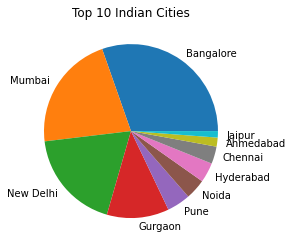

Bangalore 634
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [150]:
data=dataset.copy()
data.dropna(subset=['CityLocation'],inplace=True)
data['CityLocation'].replace('banglore','Banglore',inplace =True)
data['CityLocation'].replace('Delhi','New Delhi',inplace =True)
def trans(city):
    return city.split('/')[0].strip()
data['city']=data['CityLocation'].apply(trans)
city_data=data['city'].value_counts()[0:10]
city=city_data.index
count=city_data.values
plt.pie(count,labels=city)
plt.title('Top 10 Indian Cities')
plt.show()
for i in range(10):
    print(city[i],count[i])

### 3. Top 10 Indian cities based on funding amount

    Find out if cities play any role in receiving funding.
    Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
    Print the city and percentage with 2 decimal place after rounding off.

In [151]:
data=dataset.copy()
data.dropna(subset=['CityLocation'],inplace=True)
data['CityLocation'].replace('banglore','Banglore',inplace =True)
data['CityLocation'].replace('Delhi','New Delhi',inplace =True)
data.dropna(subset=['AmountInUSD'],inplace=True)
#city
def trans(city):
    return city.split('/')[0].strip()
data['city']=data['CityLocation'].apply(trans)

#amount
def convert(amount):
    return int(float(str(amount).replace(',','')))

data['AmountInUSD']=data['AmountInUSD'].apply(convert)
data['AmountInUSD']=pd.to_numeric(data['AmountInUSD'])

#group amount by city
city_amount=data.groupby('city')['AmountInUSD'].sum().sort_values(ascending=False)

#split
city=city_amount.index
amount=city_amount.values
sum1=0
for i in range(10):
    sum1=sum1+amount[i]
for i in range(10):
    print(city[i],format((amount[i]*100/sum1),'.2f')) 
    #print(city[i],format((amount[i]/amount.sum()),'.2%')) 

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


### 4. Investment type with funding amount

    There are 4 different type of investments. 
    Find out percentage of amount funded for each investment type.
    Plot a pie chart to visualise.
    Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

In [167]:
data=dataset.copy()
data.dropna(subset=['InvestmentType'],inplace=True)
data.dropna(subset=['AmountInUSD'],inplace=True)

#amount
def convert(amount):
    return amount.replace(',','')
data['AmountInUSD']=data['AmountInUSD'].apply(convert)
data['AmountInUSD']=pd.to_numeric(data['AmountInUSD'])

#investment types
data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)

#group amount by investment types
type_amount=data.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)

#split
types=type_amount.index
amount=type_amount.values
sum2=0
for i in range(4):
    sum2=sum2+amount[i]
for i in range(4):
    print(types[i],format((amount[i]*100/sum2),'.2f'))
    

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


### 5. Top 5 industries based on funding amount

Which type of companies got more easily funding. To answer this question?:

    Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
    Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

In [188]:
data=dataset.copy()
data.dropna(subset=['IndustryVertical'],inplace=True)
data.dropna(subset=['AmountInUSD'],inplace=True)

#amount
def convert(amount):
    return amount.replace(',','')
data['AmountInUSD']=data['AmountInUSD'].apply(convert)
data['AmountInUSD']=pd.to_numeric(data['AmountInUSD'])

#industry
data['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)
data['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
data['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)

#group amount by industry
industry_amount=data.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)

#split
industry=industry_amount.index
amount=industry_amount.values
sum3=0
for i in range(len(amount)):
    sum3=sum3+amount[i]

for i in range(5):
    print(industry[i],format((amount[i]*100/sum3),'.2f'))

Ecommerce 25.01
Consumer Internet 22.18
Technology 6.45
Online Marketplace 4.09
E-Commerce & M-Commerce platform 3.97


### 6. Top startups based on funding amount¶

    Find top 5 startups with most amount of total funding.
    Print the startup name in descending order with respect to amount of funding.

In [198]:
data=dataset.copy()

#startups
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

#amount
def convert(amount):
    return float(str(amount).replace(',',''))
data['AmountInUSD']=data['AmountInUSD'].apply(convert)
data['AmountInUSD']=pd.to_numeric(data['AmountInUSD'])

#group amount based on startup names
startup_amount=data.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)

#split
startup=startup_amount.index

for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


### 7. Top 5 startups based on funding rounds

In [201]:
data=dataset.copy()

data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

rounds=data['StartupName'].value_counts()
startup_name=rounds.index
funding_rounds=rounds.values

for i in range(5):
    print(startup_name[i],funding_rounds[i])

#group funding rounds based on startup names


Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


### 8. Top investors

    Find the Investors who have invested maximum number of times.
    Print the investor name and number of times invested as integer value.

In [240]:
data=dataset.copy()
data.dropna(subset=['InvestorsName'],inplace=True)
def InvestorsNameDict(array):
    l={}
    for i in array:
        if ',' not in i:
            if i in l:
                l[i]+=1
            else:
                l[i]=1
        else:
            s=i.strip().split(',')
            for j in s:
                if j.strip() in l:
                    l[j.strip()]+=1
                else:
                    l[j.strip()]=1
    return l
dictionary=InvestorsNameDict(data['InvestorsName'])
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
ans=dataf.sort_values(by=[0],ascending=False)
a=ans.index[0]
b=ans.values[0][0]
print(a,b)

Sequoia Capital 64
